<a href="https://colab.research.google.com/github/BountyHunter1999/Learning-PyTorch-Notebooks/blob/main/2_Pytorch_Regression_(Moore's_Law).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
# Get the Data
!wget -nc  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-02-01 16:46:31--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-02-01 16:46:31 (43.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [15]:
!head head moore.csv

head: cannot open 'head' for reading: No such file or directory
==> moore.csv <==
1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [20]:
# Load in the data
data = pd.read_csv('moore.csv', header=None)
data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [21]:
data = data.values
data[:5]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100]])

In [22]:
data[:, 0].shape

(162,)

In [23]:
data[:, 0].reshape(-1, 1).shape # all rows but a column dimension added

(162, 1)

In [24]:
X = data[:, 0].reshape(-1, 1) #make it a 2D array of size N X D where D = 1
Y = data[:, 1].reshape(-1, 1)

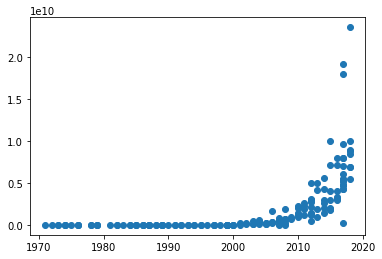

In [26]:
# Plot the data - it is exponential:
plt.scatter(X, Y)

- C = C0 * r^t 
- logC =  t * logr + logC0 
- Y = X * a + b

**Linear in terms of time**

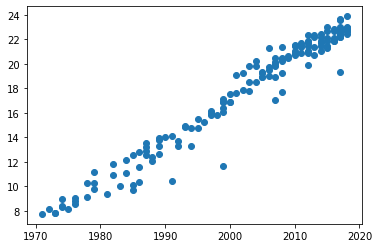

In [27]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y);
# this is now linear 

In [28]:
# Scale and center both the x and y axes
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()

X = (X - mx)/sx  # Normalization
Y = (Y - my)/sy

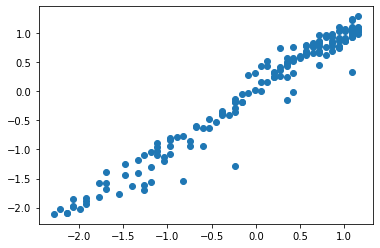

In [29]:
# Everything is centered around 0 and in a small range
plt.scatter(X, Y);

In [30]:
# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [32]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [34]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [35]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [36]:
type(inputs)

torch.Tensor

In [39]:
# Train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
  # Zero the gradient
  optimizer.zero_grad()

  # forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # save the loss
  losses.append(loss.item())

  # backward and optimize
  loss.backward()
  optimizer.step() 

  print(f"Epoch {it + 1}/ {n_epochs}, Loss: {loss.item()}")  

Epoch 1/ 100, Loss: 1.3630398511886597
Epoch 2/ 100, Loss: 1.3105874061584473
Epoch 3/ 100, Loss: 1.224852442741394
Epoch 4/ 100, Loss: 1.1208165884017944
Epoch 5/ 100, Loss: 1.0093941688537598
Epoch 6/ 100, Loss: 0.8980681896209717
Epoch 7/ 100, Loss: 0.7916436195373535
Epoch 8/ 100, Loss: 0.6929450631141663
Epoch 9/ 100, Loss: 0.6033952236175537
Epoch 10/ 100, Loss: 0.523465633392334
Epoch 11/ 100, Loss: 0.453011691570282
Epoch 12/ 100, Loss: 0.3915145993232727
Epoch 13/ 100, Loss: 0.33824920654296875
Epoch 14/ 100, Loss: 0.2923981547355652
Epoch 15/ 100, Loss: 0.2531256079673767
Epoch 16/ 100, Loss: 0.21962356567382812
Epoch 17/ 100, Loss: 0.1911383718252182
Epoch 18/ 100, Loss: 0.1669841706752777
Epoch 19/ 100, Loss: 0.14654801785945892
Epoch 20/ 100, Loss: 0.12928931415081024
Epoch 21/ 100, Loss: 0.1147361546754837
Epoch 22/ 100, Loss: 0.10247980803251266
Epoch 23/ 100, Loss: 0.09216854721307755
Epoch 24/ 100, Loss: 0.08350120484828949
Epoch 25/ 100, Loss: 0.07622093707323074
Epoc

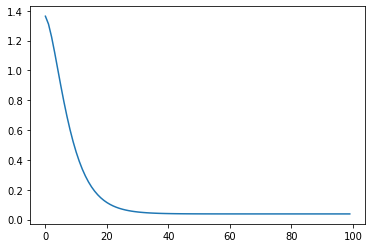

In [40]:
# Loss per iteration
plt.plot(losses)

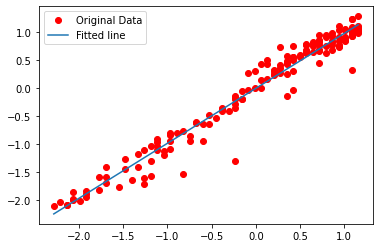

In [41]:
# Plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Original Data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [42]:
# What does this mean?
w = model.weight.data.numpy()
print(w) # this is logr

[[0.9803516]]


# Transforming back to original scale

Our original hypothesis is that the growth is exponential. This has the form:

$$ C = C_0 r ^ t $$

In this equation, $C$ is the transistor count, $t$ is the year, $C_0$ is the original transistor count at year $0$, and $r$ is the rate of growth.

We made this equation linear by taking the log of both sides.

$$ \log C = \log C_0 + \log r * t $$

Here, $\log C$ represents the variable that goes along the y-axis, and $t$ represents the variable that goes along the x-axis.

In other words, under our hypothesized model, the log of transistor counts is linear with respect to time.

Let us rename the variables to a more familiar form:

$$ y = a x + \log C_0 $$

Now $y=\log C$ represents the log of transistor counts and $x=t$ represents time. $a = \log r$ is the slope and $\log C_0$ is the y-intercept.

# Our Model

We normalized the data as follows:

$$ y' = \frac{y - m_y}{s_y} $$

$$ x' = \frac{x - m_x}{s_x} $$

Here, $m_x$ represents the sample mean of the $x$ data and $s_x$ represens the sample standard deviation of the $x$ data, with analogous definitions for $m_y$ and $s_y$.

Our model looks like:

$$ y' = wx' + b $$

We can recover the original model by substituting $x'$ and $y'$ with corresponding expressions in terms of $x$ and $y$.

$$ \frac{y - m_y}{s_y} = w \frac{x - m_x}{s_x} + b $$

After some algebraic manipulation (try it yourself, it's only high school math), we get:

$$ y = w \frac{s_y}{s_x} x - w \frac{s_y}{s_x} m_x + b s_y + m_y = a x + \log C_0 $$

It is clear that the coefficient in front of $x$ represents our original $a$, and the sum of all the other terms represents $\log C_0$.

We are only interested in the doubling time, so we have found that:

$$ a = w \frac{s_y}{s_x} $$

In [48]:
# to get r, which is interms of log
a = w[0, 0] * sy/ sx
a

0.3416060033784324

# Exponential Growth Model

Our equation is currently linear. We still need to find the doubling time.

Our original model for exponential growth is:

$$ C = C_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log C_0 $$

This is our linear equation:

$$ y = ax + \log C_0 $$

Where:

$$ y = \log C $$
$$ a = \log r $$
$$ x = t $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.341659983 $$

so that:

$$ r = e^{0.341659983} = 1.40728 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = C_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = C_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (C_0 r ^ {t'}) / C_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [50]:
np.exp(a) # doubles 

1.4072057539642213

In [51]:
print("Time to double:", np.log(2) / a)

Time to double: 2.02908372131878


What happens when you don't normalize the data? <br>
- There is a chance of getting misleading results. Some true values will be considered as outliers during the processing. If you don't normalize your data, then the convergence will be slower. Your training time will be more compared to training using normalized data.

But what happens to the optimization? Can you use the same learning rate as we did originally?
- nop